Vanishing(= gözden kaybolmak) gradient(= bilgi) problem

loss değeri, düşük seviyedeki özelliklere (low level feature) ulaşıldığında bu bilgi kaybetme problemi ortaya çıkar. (Loss, output yani çıktı sırasında oluşturuluyordu)

# Deep Residual Networks (ResNets)

## Vanishing Gradient Problemi

Vanishing Gradient Problemi, bir nöral ağın (neural network) çok derin olduğu durumlarda ortaya çıkan bir sorundur. Örneğin, 1000 sınıfı sınıflandırmak için 50 katman içeren bir nöral ağ, 20 katman içeren bir nöral ağa göre daha başarısız olabilir. Bunun nedeni, ağın ilk katmanlarındaki (low-level) bilginin kaybolmasıdır.

Gradient, loss değerinin weight'lere göre türevi olarak tanımlanır ve weight'lerin (ağırlıkların) güncellenmesinde kullanılır:

W =: W - (learning rate) * Gradient

Ancak network’ün çok derin olduğu durumlarda, loss fonksiyonunun weight'lere göre türevini hesaplarken vanishing problemini yaşarız, yani gradient (türev) kaybolur.

Low-level (düşük seviye) katmanlarda bilgi kaybetme problemi meydana gelir. Bu düşük seviyedeki özellikler (low level feature), güncellenmez ve bu nedenle bilgi kaybına uğrar.

Vanishing Gradient Problemi, düşük seviyedeki (low-level) katmanlardan kaynaklanan bilgi kaybı ile ilgilidir. Bu sorunun üstesinden gelmek için "Derin Artıklı Ağlar (Deep Residual Networks)" gibi teknikler kullanılabilir.

## Deep Residual Networks

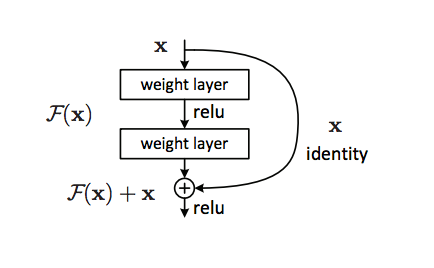

# Infrared Pedestrian Dataset (Kızılötesi Yaya Veri Seti)

Kızılötesi, bir kamera görüntüsünü ifade eder. Bu veri seti, bir aracın üzerine yerleştirilen kamera görüntülerini içerir. Bu görüntülerin boyutu 64*32'dir.

"Pedestrian," yaya yani insan anlamına gelir.

Bu veri seti iki farklı sınıf içerir: 
1. Sınıf, bir görüntüde insanın vardır (pedestrian).
2. Sınıf, bir görüntüde insanın olmadığını ifade eder (non-pedestrian).

# Pytorch ile CNN

In [1]:
# pytorch
import torch
import torch.nn as nn # neural network yapısı
import torch.nn.functional as F # fonksiyonlar
import torch.utils.data
import torch.optim as optim

from PIL import Image # resimleri preprocess yaparken kullanırız

# görselleştirme
import matplotlib.pyplot as plt

import numpy as np
import os # resimleri import etmek için
import time # algoritmanın çalışma zamanı

GPU, grafik kartıdır. grafik kartı, neural network yapılarında CPU'dan çok daha hızlı çalışıyor bu yüzden kodları GPU yani grafik kartta çalıştırabiliriz böylece daha hızlı olur. default olarak kodlar CPU'da çalışır. GPU'da çalıştırmak için:

``` python
# cuda indirilip kurulmalı
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: ", device)
```

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cpu


### IR Pedestrian Projesi: Veri Seti Yükleme

In [3]:
# resimleri yüklemek için
# ilgili klasördeki tüm resimleri alıp array isimli parametreye yükler

def read_images(path, num_img): # path: klasörün yolu, num_img: kaç tane resim okunacak
    # array: num_img satır, 64*32 sütundan oluşur ve bütün elemanları 0'dır.
    array = np.zeros([num_img, 64*32]) # resimlerin boyutu 64 satır, 32 sütun
    # her bir satır bir tane resim olacak
    
    i = 0
    # path'in içerisindeki bütün resimleri yükler
    # path klasörün yolu
    # img ise o klasörün altındaki dosyalar
    for img in os.listdir(path): 
        img_path = path + "//" + img
        img = Image.open(img_path, mode="r") # read
        data = np.asarray(img, dtype = "uint8") # unit8'e çevirelim
        # resimi array'de depolamak için düzleştirelim
        data = data.flatten() # 5*5 -> 1*25
        array[i,:] = data # i. satırın bütün sütunlarına düzleştirilen data'yı yazdır.
        i += 1
        
    return array

#### train - negatif

In [4]:
train_neg_path = r"LSIFIR/Classification/Train/neg"
num_train_neg_img = 43390
train_negative_array = read_images(train_neg_path, num_train_neg_img)

In [5]:
# pytorch kütüphanesinin numpy ile bir arayüzü var 
# olduğundan numpy array'i pytorch array'e çevirebilirim
# numpy'da array, torch'da tensor kullanılır.

# resimleri yani input'ları yükledik (x)
x_train_negative_tensor = torch.from_numpy(train_negative_array)
print("x_train_negative_tensor:", x_train_negative_tensor.size())

x_train_negative_tensor: torch.Size([43390, 2048])


x_train_negative_tensor içerisinde 43390 tane resim vardır.

In [6]:
# bu resimlerin label'larını yükleyelim
# label y
# yaya olmadığı için label 0 olsun
y_train_negative_tensor = torch.zeros(num_train_neg_img, dtype=torch.long)
print("y_train_negative_tensor:", y_train_negative_tensor.size())

y_train_negative_tensor: torch.Size([43390])


#### train - pozitif

In [7]:
train_pos_path = r"LSIFIR/Classification/Train/pos"
num_train_pos_img = 10208
train_positive_array = read_images(train_pos_path, num_train_pos_img)

In [8]:
# pytorch kütüphanesinin numpy ile bir arayüzü var 
# olduğundan numpy array'i pytorch array'e çevirebilirim
# numpy'da array, torch'da tensor kullanılır.

# resimleri yani input'ları yükledik (x)
x_train_positive_tensor = torch.from_numpy(train_positive_array)
print("x_train_positive_tensor:", x_train_positive_tensor.size())

x_train_positive_tensor: torch.Size([10208, 2048])


In [9]:
# bu resimlerin label'larını yükleyelim
# label y
# yaya olduğu için label 1 olsun
y_train_positive_tensor = torch.ones(num_train_pos_img, dtype=torch.long)
print("y_train_positive_tensor:", y_train_positive_tensor.size())

y_train_positive_tensor: torch.Size([10208])


y_train_positive_tensor içerisinde 10208 tane resim vardır.

#### train-pos ve train-neg veri setlerini birleştirip train veri setini oluşturalım

In [10]:
# concat
# birleştirirken yukarıdan aşağıya doğru birleştireceğim (alt alta): 0 (satırlar birleştirilir)
x_train = torch.cat((x_train_negative_tensor, x_train_positive_tensor), 0) # input
y_train = torch.cat((y_train_negative_tensor, y_train_positive_tensor), 0) # label

print("x_train:", x_train.size())
print("y_train:", y_train.size())

x_train: torch.Size([53598, 2048])
y_train: torch.Size([53598])


#### test - neg

In [11]:
test_neg_path = r"LSIFIR/Classification/Test/neg"
num_test_neg_img = 22050
test_negative_array = read_images(test_neg_path, num_test_neg_img)

In [12]:
# pytorch kütüphanesinin numpy ile bir arayüzü var 
# olduğundan numpy array'i pytorch array'e çevirebilirim
# numpy'da array, torch'da tensor kullanılır.

# resimleri yani input'ları yükledik (x)
x_test_negative_tensor = torch.from_numpy(test_negative_array[:20855,:])
print("x_test_negative_tensor:", x_test_negative_tensor.size())

x_test_negative_tensor: torch.Size([20855, 2048])


In [13]:
# bu resimlerin label'larını yükleyelim
# label y
# yaya olmadığı için label 0 olsun
y_test_negative_tensor = torch.zeros(20855, dtype=torch.long)
print("y_test_negative_tensor:", y_test_negative_tensor.size())

y_test_negative_tensor: torch.Size([20855])


#### test - pos

In [14]:
test_pos_path = r"LSIFIR/Classification/Test/pos"
num_test_pos_img = 5944
test_positive_array = read_images(test_pos_path, num_test_pos_img)

In [15]:
x_test_positive_tensor = torch.from_numpy(test_positive_array)
print("x_test_positive_tensor:", x_test_positive_tensor.size())

x_test_positive_tensor: torch.Size([5944, 2048])


In [16]:
# bu resimlerin label'larını yükleyelim
# label y
# yaya olduğu için label 1 olsun
y_test_positive_tensor = torch.ones(num_test_pos_img, dtype=torch.long)
print("y_test_positive_tensor:", y_test_positive_tensor.size())

y_test_positive_tensor: torch.Size([5944])


#### test-pos ve test-neg veri setlerini birleştirip train veri setini oluşturalım

In [17]:
# concat
# birleştirirken yukarıdan aşağıya doğru birleştireceğim (alt alta): 0 (satırlar birleştirilir)
x_test = torch.cat((x_test_negative_tensor, x_test_positive_tensor), 0) # input
y_test = torch.cat((y_test_negative_tensor, y_test_positive_tensor), 0) # label

print("x_test:", x_test.size())
print("y_test:", y_test.size())

x_test: torch.Size([26799, 2048])
y_test: torch.Size([26799])


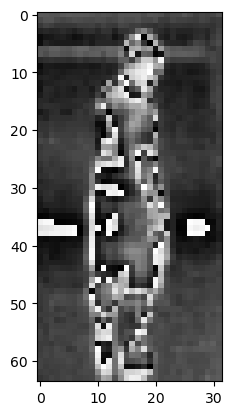

In [18]:
# herhangi bir resmi görselleştirelim
plt.imshow(x_train[49000,:].reshape(64,32), cmap="gray")
plt.show()

### IR Pedestrian Projesi: Python(Pytorch) ile CNN Modeli Oluşturma

In [19]:
# Hiperparametreler
num_epochs = 5000
num_classes = 2
batch_size = 8933
learning_rate = 0.00001

In [20]:
# CNN sınıfı
class Net(nn.Module): # pytorch'tan neural network ile ilgili yapıları kullanacağız (inheritance)
    # constructor
    def __init__(self): # pytorch'tan neural network ile ilgili yapılar
        super(Net, self).__init__() # inheritance
        
        # feature extraction
        # 2D convolution layer
        self.conv1 = nn.Conv2d(1, 10, 5) # 1 input image channel, 10 output channel, 5*5 convolution filtresi
        self.pool = nn.MaxPool2d(2,2) # pooling layer
        self.conv2 = nn.Conv2d(10, 16, 5) # 2. hidden layer
        
        # fully connected layer
        self.fc1 = nn.Linear(16*13*5, 520) # ilk linear layer'ın input'u 16*13*5, output'u 520
        self.fc2 = nn.Linear(520, 130)
        self.fc3 = nn.Linear(130, num_classes)
        
    
    # forward propagation
    def forward(self, x): # x, input
        
        # conv1'in output'u relu aktivasyon fonksiyonuna girer
        # F.relu(self.conv1(x))
        # convolution layer 1'den sonra aktivasyon fonksiyonu (relu) belirlemiş oldum
        
        # bundan sonra pooling yapılır:
        # input ilk önce convolution layer'dan çıkıyor, sonra relu sonrada pooling
        x = self.pool(F.relu(self.conv1(x)))
        
        # 2. convolution layer
        x = self.pool(F.relu(self.conv2(x)))
        
        # düzleştirelim (flatten)
        x = x.view(-1, 16*13*5) # boyutu: 16*13*5, -1: kendisi hesaplar
        
        # fully connected layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [21]:
# TensorDataset metoduyla x_train ve y_train veri setini birleştirip, train veri setini elde edelim
train = torch.utils.data.TensorDataset(x_train, y_train)

In [22]:
# train veri setini network'e yükleyebilmek için data tipinde olmalı

# x_train ve y_train tensor'dü ve TensorDataset ile birleştirildi ve tensor train veri seti oluşturuldu
# train'i data çevirelim ve eğitime hazır hale getirelim:
# shuffle=True: data'yı karıştırarak eğit
trainloader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle=True)

In [23]:
# TensorDataset metoduyla x_test ve y_test veri setini birleştirip, test veri setini elde edelim
test = torch.utils.data.TensorDataset(x_test, y_test)

In [24]:
# test veri setini network'e yükleyebilmek için data tipinde olmalı
testloader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle=False)

In [25]:
# CNN'ü tanımlayalım
net = Net() # GPU'da çalıştıracaksak GPU'ya yollayalım: net = Net().to(device)

### IR Pedestrian Projesi: Python(Pytorch) ile CNN Loss Fonksiyonu ve Optimizer

In [26]:
criterion = nn.CrossEntropyLoss()

In [27]:
# net.parameters(): weight'ler ve bias'lar (input)
# Stochastic gradient descent(SGD)'in hızlanma parametresi
optimizer = optim.SGD(net.parameters(), lr = learning_rate, momentum=0.8)

### IR Pedestrian Projesi: Python(Pytorch) ile CNN Modeli Eğitimi

In [28]:
# başlangıç zamanı
start = time.time() # şu anki zaman

In [29]:
# train boyunca elde etmemiz gereken metrikler vardır: accuracy ve loss
# accuracy ve loss'u depolayalım
train_acc = []
test_acc = []
loss_list = [] # toplam hata

In [30]:
use_gpu = False # eğer gpu(grafik kartı) kullanılıyorsa True yapmalıyız

In [31]:
# train

In [32]:
# 5000 tane epoch demek net'in 5000 kere train veri setiyle eğitilmesidir.
for epoch in range(num_epochs):
    for i, data in enumerate(trainloader, 0): # batch_size kullandığım için 1 for döngüsü daha oluşturdum
        # trainloader, eğitim için kullanacağımız veri setidir.
        # i: index, 0, 1, 2... trainloader'daki resim sayısı kadar olacak
        
        #### preprocess
        # data: resimler ve resimlerin label'ları
        inputs, labels = data # resim, resmin etiketi yani sınıfı (0/1 insan var mı yok mu ?)
        # input'un boyutu: batch_size, 64*32
        # view: reshape
        # train için input'u düzleştirmeliyiz
        inputs = inputs.view(batch_size, 1, 64, 32) # 1 tane renk kanalı, resmin boyutu 64*32
        inputs = inputs.float()
        
        # GPU kullanmak için
        if use_gpu:
            if torch.cuda.is_available():
                inputs, labels = inputs.to(device), labels.to(device)
                
        # gradient, CNN modelinin öğrenmesini sağlayacak türevler
        # zero gradient
        # başlangıçta gradientleri yani türevleri sıfırlamak zorundayım
        optimizer.zero_grad() # gradientler sıfırlanır.
        
        # forward propagation
        outputs = net(inputs)
        
        # loss
        loss = criterion(outputs, labels)
        
        # back propagation
        loss.backward() # gradient'leri buldum
        
        # weight'leri güncelleyelim
        optimizer.step()
        
    # her epoch tamamlandıktan sonra test ve train sonuçlarına bakalım
    # eğitilen CNN'in accuracy değerleri
    
    # test
    correct = 0 # test veri setinde ne kadar doğru bildi ?
    total = 0 # ne kadar veri var
    
    # oto grad engine kapatalım
    with torch.no_grad(): # bu komut ile back propagation kapatılır
        for data in testloader:
            # resimler, resimlerin sınıfları
            images, labels = data
            
            # resimleri reshape yapalım
            images = images.view(batch_size, 1, 64, 32)
            images = images.float() # float'a çevirdim
            
            # GPU kullanmak için
            if use_gpu:
                if torch.cuda.is_available():
                    images, labels = inputs.to(device), labels.to(device)
                    
            # resimlerin doğru olup olmadığını test edelim
            # CNN'e resimleri yolladım
            outputs = net(images)
            
            # outputs doğru mu yanlış mı?
            # output'un data'sından maksimum değeri çekeceğim
            # maksimum değer tahmin(predict) edilecek
            _, predicted = torch.max(outputs.data, 1) # outputs yani tahminler 0 ya da 1 dir
            # 1: dimension. Yani bu  aramayı satılarda mı yoksa sutunlarda mı yapacak anlamına geliyor. 1 demek satırlarda ara demek.
            
            total += labels.size(0) # toplam veri sayısı bulunur
            
            # doğru tahminleri toplayalım
            correct += (predicted == labels).sum().item() # true 1 demek, false 0 demek
            # item() ile int değer elde ederim
        
        acc1 = 100*correct/total
        print("accuracy test:", acc1)
        test_acc.append(acc1)
        
        
        # train
        correct = 0 # train veri setinde ne kadar doğru bildi ?
        total = 0 # ne kadar veri var
    
        # oto grad engine kapatalım
        with torch.no_grad(): # bu komut ile back propagation kapatılır
            for data in trainloader:
                # resimler, resimlerin sınıfları
                images, labels = data
            
                # resimleri reshape yapalım
                images = images.view(batch_size, 1, 64, 32)
                images = images.float() # float'a çevirdim
            
                # GPU kullanmak için
                if use_gpu:
                    if torch.cuda.is_available():
                        images, labels = inputs.to(device), labels.to(device)
                    
                # resimlerin doğru olup olmadığını test edelim
                # CNN'e resimleri yolladım
                outputs = net(images)
            
                # outputs doğru mu yanlış mı?
                # output'un data'sından maksimum değeri çekeceğim
                # maksimum değer tahmin(predict) edilecek
                _, predicted = torch.max(outputs.data, 1) # outputs yani tahminler 0 ya da 1 dir
                # 1: dimension. Yani bu  aramayı satılarda mı yoksa sutunlarda mı yapacak anlamına geliyor. 1 demek satırlarda ara demek.
            
                total += labels.size(0) # toplam veri sayısı bulunur
            
                # doğru tahminleri toplayalım
                correct += (predicted == labels).sum().item() # true 1 demek, false 0 demek
                # item() ile int değer elde ederim
        
            acc2 = 100*correct/total
            print("accuracy test:", acc2)
            train_acc.append(acc2)      

accuracy test: 31.8631292212396
accuracy test: 30.654128885406173
accuracy test: 74.34605768871972
accuracy test: 78.9021978432031
accuracy test: 76.31628045822605
accuracy test: 79.8257397664092
accuracy test: 75.30504869584686
accuracy test: 79.64476286428598
accuracy test: 73.44303891936266
accuracy test: 79.39102205306168
accuracy test: 72.48404791223552
accuracy test: 79.3163924027016
accuracy test: 72.872122094108
accuracy test: 79.70819806709206
accuracy test: 73.33855740885853
accuracy test: 80.11866114407253
accuracy test: 73.65946490540692
accuracy test: 80.45449457069293
accuracy test: 73.8236501361991
accuracy test: 80.80711966864435
accuracy test: 73.81991865368111
accuracy test: 81.03287436098361
accuracy test: 73.93186312922124
accuracy test: 81.34258740997798
accuracy test: 74.05127056979738
accuracy test: 81.63550878764133
accuracy test: 74.20426135303556
accuracy test: 81.89857830516064
accuracy test: 74.35725213627374
accuracy test: 82.10194410239188
accuracy test: 7

KeyboardInterrupt: 

In [ ]:
print("train tamamlandı")

In [ ]:
end = time.time() # bu andaki zaman

In [ ]:
# arada geçen zaman
process_time = (end - start)/60
print("process_time:", process_time)